In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv('data/price.csv')
df['Ticker'].unique()

array(['AAPL', 'MSFT', 'GOOG', 'AMZN', 'BRK-A', 'TSLA', 'UNH', 'JNJ',
       'XOM', 'V'], dtype=object)

In [7]:
df_AAPL = df.loc[df['Ticker']=='AAPL']
df_AAPL

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2018-12-03,46.115002,46.235001,45.302502,46.205002,44.595947,163210000,AAPL
1,2018-12-04,45.237499,45.597500,44.067501,44.172501,42.634228,165377200,AAPL
2,2018-12-06,42.939999,43.695000,42.605000,43.680000,42.158878,172393600,AAPL
3,2018-12-07,43.372501,43.622501,42.075001,42.122501,40.655613,169126400,AAPL
4,2018-12-10,41.250000,42.522499,40.832500,42.400002,40.923454,248104000,AAPL
...,...,...,...,...,...,...,...,...
1003,2022-11-28,145.139999,146.639999,143.380005,144.220001,144.220001,69246000,AAPL
1004,2022-11-29,144.289993,144.809998,140.350006,141.169998,141.169998,83763800,AAPL
1005,2022-11-30,141.399994,148.720001,140.550003,148.029999,148.029999,111380900,AAPL
1006,2022-12-01,148.210007,149.130005,146.610001,148.309998,148.309998,71250400,AAPL


In [4]:
X,y = df_AAPL[:-1].drop(columns=['Ticker','Date']), df_AAPL['Open'][1:]
X

,Open,High,Low,Close,Adj Close,Volume
0,46.115002,46.235001,45.302502,46.205002,44.595947,163210000
1,45.237499,45.597500,44.067501,44.172501,42.634228,165377200
2,42.939999,43.695000,42.605000,43.680000,42.158878,172393600
3,43.372501,43.622501,42.075001,42.122501,40.655613,169126400
4,41.250000,42.522499,40.832500,42.400002,40.923454,248104000
...,...,...,...,...,...,...
1002,148.309998,148.880005,147.119995,148.110001,148.110001,35195900
1003,145.139999,146.639999,143.380005,144.220001,144.220001,69246000
1004,144.289993,144.809998,140.350006,141.169998,141.169998,83763800
1005,141.399994,148.720001,140.550003,148.029999,148.029999,111380900


In [5]:
y.reset_index(drop=True)

0        45.237499
1        42.939999
2        43.372501
3        41.250000
4        42.915001
           ...    
1002    145.139999
1003    144.289993
1004    141.399994
1005    148.210007
1006    145.960007
Name: Open, Length: 1007, dtype: float64

In [6]:
train_size = round(0.8*len(df_AAPL))
data_train,data_test=X.iloc[:train_size],X.iloc[train_size:]
X_train,y_train,X_test,y_test = np.array(X.iloc[:train_size]),np.array(y.iloc[:train_size]),np.array(X.iloc[train_size:]),np.array(y.iloc[train_size:])

In [7]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred =LR.predict(X_test)
rmse=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))
print(rmse)

1.8258106916732346


C:\Users\trann\AppData\Local\Temp\ipykernel_17940\3986365771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['Predictions'] = y_pred


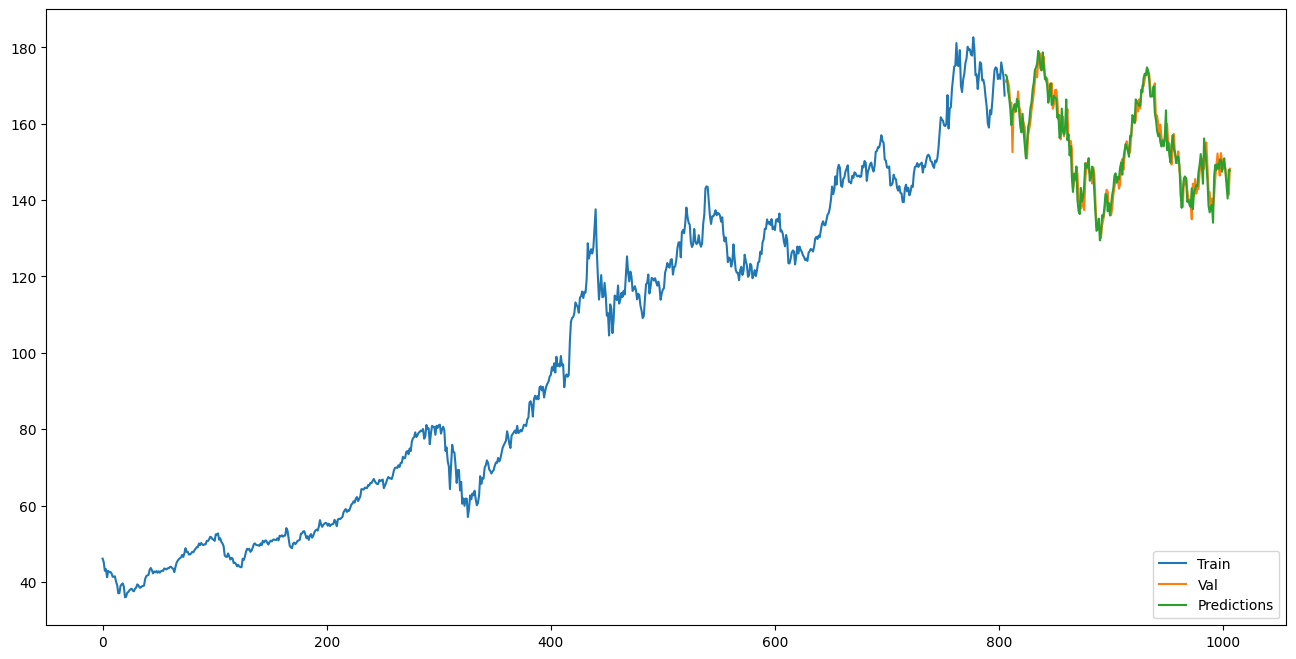

In [8]:
plt.figure(figsize=(16,8))
data_test['Predictions'] = y_pred
plt.plot(data_train['Open'])
plt.plot(data_test[['Open', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

In [9]:
LR.coef_

array([-3.01038088e-01,  2.12474547e-01,  2.50826680e-01,  1.30417888e+00,
       -4.64265278e-01, -1.03674624e-10])